# Heart Disease Prediction using ML

### Steps to produce the predictions

- Steps
    - Firstly import All required or used modules
    - Then import data
    - Do **Data Cleaning**, it means find the missing data and replace this null data with median or mean of the column
    - After data cleaning, we have to group the data into **Features** and **Labels** (X and Y respectively)
    - Now we have to prepare a selection model.
    - We use  **test_train_split**  selection model that we imported from sklearn
    - We follow 80:20 ratio, which is the Training data size is 80% of the total data size and 20% of it for test data.
    - Now we use our training model imported from sklearn.
    - We train the model with our training dataset.
    - We then predict the the outputes of the model with `model.predict(xtrained, ytrained)`
    - This gives the predicted training model outputs
    - From this we can find out the training model accuracy using `accuracy_score()`
    - We will do the same steps following for the test_data,
    - Hence we will find the model accuracy with test data.
    

## Importing modules

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns

## Reading data

In [91]:
data = pd.read_csv("hdp data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Plotting the data for finding correlation between columns

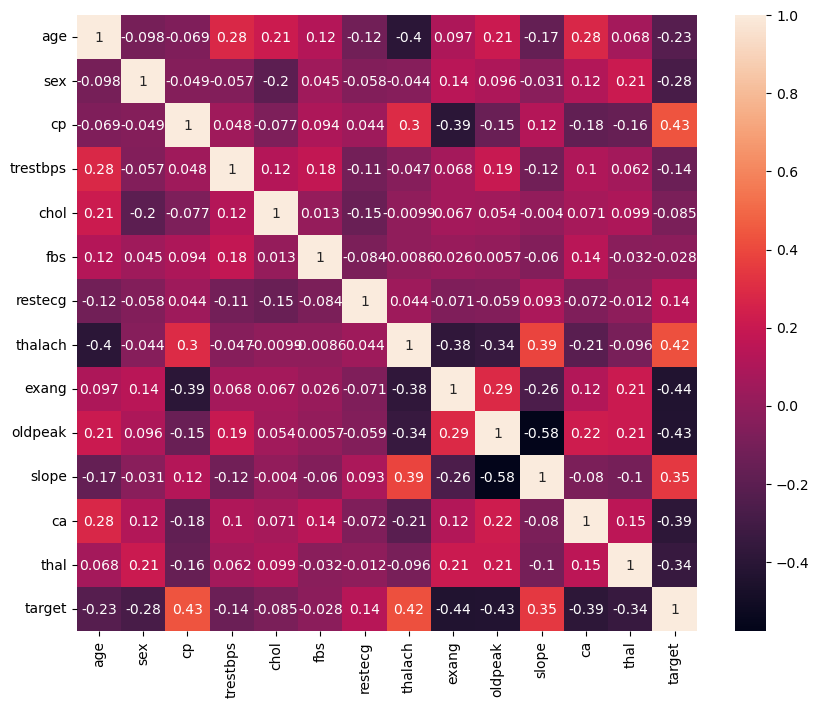

In [92]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

### Grouping the data, (Features{x}, lables{y})

In [93]:
x = data.drop(["target"], axis = 1)
y = data.target

print(x.head())
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


### Now we have to split the training and testing data

In [94]:
xTrain,xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)
print(xTrain.size, xTest.size)

2756 1183


### We import our training model

In [95]:
model = LogisticRegression(solver="lbfgs",max_iter = 1000)

In [96]:
model.fit(xTrain, yTrain)

LogisticRegression(max_iter=1000)

#### Prediction of training dataset

In [97]:
predction = model.predict(xTrain)
predction

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [98]:
trainAcc = accuracy_score(predction, yTrain)
print("Training Acc of the model ", trainAcc)

Training Acc of the model  0.8915094339622641


#### Prediction of Test dataset

In [99]:
testPred = model.predict(xTest)

In [100]:
testPred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [101]:
testAcc = accuracy_score(testPred, yTest)
print("Accuracy of testing dataset ", testAcc)

Accuracy of testing dataset  0.7692307692307693


### we use another model, svm classifier(svc support vector classifier)

In [102]:
clf = make_pipeline(StandardScaler(), SVC(gamma = "auto"))

In [103]:
clf.fit(xTrain,yTrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [104]:
clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [105]:
pred = clf.predict(xTrain)

In [106]:
pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [107]:
trainSvcAcc = accuracy_score(pred, yTrain)
print("Training accuracy using svc model ", trainSvcAcc)

Training accuracy using svc model  0.9339622641509434


In [108]:
testPred = clf.predict(xTest)

In [109]:
testSvcAcc = accuracy_score(testPred, yTest)
print("Testing accuracy of svc model ", testSvcAcc)

Testing accuracy of svc model  0.7692307692307693
